## 3.4.1  IMDB 데이터셋

In [1]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [2]:
train_data[0]
train_labels[0]

1

In [3]:
word_idx = imdb.get_word_index()

reverse_word_index = dict([value, key] for (key, value) in word_idx.items())

decoded_review = " ".join([reverse_word_index.get(i - 3, "!") for i in train_data[0]])

print(decoded_review)

! this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ! is an amazing actor and now the same being director ! father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ! and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ! to the two little boy's that played the ! of norman and paul they were just brilliant children are often left out of the ! list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

</br>

## 3.4.2 데이터 준비

one-hot encoding 예시

example 1 : train data 준비

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [5]:
y_train.shape

(25000,)

In [6]:
y_test.shape

(25000,)

</br>

##  3.4.3 신경망 모델 만들기

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
model.compile(optimizer="rmsprop",
             loss = "binary_crossentropy",
             metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

</br>

##  3.4.4 훈련 검증

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 122us/sample - loss: 0.5831 - acc: 0.6945 - val_loss: 0.4774 - val_acc: 0.7984
Epoch 2/20
15000/15000 [==============================] - 1s 95us/sample - loss: 0.3683 - acc: 0.8926 - val_loss: 0.3402 - val_acc: 0.8786
Epoch 3/20
15000/15000 [==============================] - 1s 95us/sample - loss: 0.2533 - acc: 0.9264 - val_loss: 0.2911 - val_acc: 0.8914
Epoch 4/20
15000/15000 [==============================] - 1s 95us/sample - loss: 0.1969 - acc: 0.9387 - val_loss: 0.2798 - val_acc: 0.8895
Epoch 5/20
15000/15000 [==============================] - 1s 95us/sample - loss: 0.1578 - acc: 0.9513 - val_loss: 0.2797 - val_acc: 0.8882
Epoch 6/20
15000/15000 [==============================] - 1s 98us/sample - loss: 0.1300 - acc: 0.9617 - val_loss: 0.2873 - val_acc: 0.8864
Epoch 7/20
15000/15000 [==============================] - 1s 96us/sample - loss: 0.1108 - acc: 0.9681 - val_loss: 0

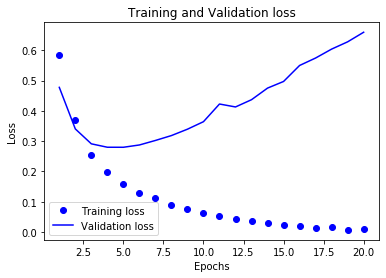

In [13]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

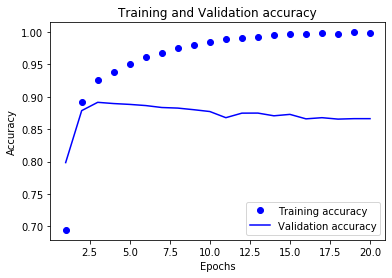

In [14]:
history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(loss)+1)

plt.plot(epochs, acc, 'bo', label="Training accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation accuracy")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [15]:
model_1 = models.Sequential()
model_1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_1.add(layers.Dense(16, activation='relu'))
model_1.add(layers.Dense(1, activation='sigmoid'))

model_1.compile(optimizer="rmsprop",
             loss="binary_crossentropy",
             metrics=["accuracy"])

model_1.fit(x_train, y_train, epochs=4, batch_size = 512)

Epoch 1/4
25000/25000 [==============================] - 2s 63us/sample - loss: 0.4917 - acc: 0.8156
Epoch 2/4
25000/25000 [==============================] - 1s 59us/sample - loss: 0.2847 - acc: 0.9060
Epoch 3/4
25000/25000 [==============================] - 1s 59us/sample - loss: 0.2140 - acc: 0.9271
Epoch 4/4
25000/25000 [==============================] - 1s 60us/sample - loss: 0.1764 - acc: 0.9378


In [16]:
results = model_1.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 93us/sample - loss: 0.2847 - acc: 0.8874


In [17]:
model_1.predict(x_test)

array([[0.18300277],
       [0.997866  ],
       [0.92365074],
       ...,
       [0.12533528],
       [0.09508559],
       [0.55928147]], dtype=float32)

In [23]:
model_2 = models.Sequential()
model_2.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model_2.add(layers.Dense(16, activation='relu'))
model_2.add(layers.Dense(1, activation='sigmoid'))

model_2.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])

history = model_2.fit(partial_x_train, partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 111us/sample - loss: 0.5106 - acc: 0.7939 - val_loss: 0.3482 - val_acc: 0.8735
Epoch 2/20
15000/15000 [==============================] - 1s 96us/sample - loss: 0.2511 - acc: 0.9135 - val_loss: 0.2791 - val_acc: 0.8906
Epoch 3/20
15000/15000 [==============================] - 1s 96us/sample - loss: 0.1647 - acc: 0.9453 - val_loss: 0.2817 - val_acc: 0.8878
Epoch 4/20
15000/15000 [==============================] - 1s 96us/sample - loss: 0.1199 - acc: 0.9645 - val_loss: 0.3025 - val_acc: 0.8840
Epoch 5/20
15000/15000 [==============================] - 1s 95us/sample - loss: 0.0855 - acc: 0.9785 - val_loss: 0.3232 - val_acc: 0.8818
Epoch 6/20
15000/15000 [==============================] - 1s 95us/sample - loss: 0.0618 - acc: 0.9873 - val_loss: 0.3543 - val_acc: 0.8800
Epoch 7/20
15000/15000 [==============================] - 1s 96us/sample - loss: 0.0447 - acc: 0.9927 - val_loss: 0

In [24]:
model_2.fit(x_train, y_train, epochs=3, batch_size=512)

Epoch 1/3
25000/25000 [==============================] - 2s 61us/sample - loss: 0.2381 - acc: 0.9336
Epoch 2/3
25000/25000 [==============================] - 1s 59us/sample - loss: 0.1214 - acc: 0.9593
Epoch 3/3
25000/25000 [==============================] - 1s 59us/sample - loss: 0.0813 - acc: 0.9757


In [25]:
results = model_2.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 92us/sample - loss: 0.4645 - acc: 0.8581


</br>

# 3.5 Multi-class classification

## 로이터 데이터셋

In [8]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)


In [9]:
word_idx = reuters.get_word_index()
reverse_word_idx = dict([(value, key) for (key, value) in word_idx.items()])
decoded_newswire = " ".join([reverse_word_idx.get(i - 3, "?") for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

</br>

## 3.5.2 데이터 준비

In [10]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    
    for i, label in enumerate(labels):
        results[i, label] = 1.
    
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

</br>

#### 위와 같이 직접 **One-hot-encoding**을 하는 경우가 있지만, 아래의 예제 처럼 keras에서는 categorical data 에 대해 범주형 인코딩(categorical encoding)을 해주는 내장함수가 있다.

In [12]:
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

</br>

## 3.5.3 모델 구성

In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))

In [14]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

</br>

## 3.5.4 훈련 검증

In [15]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [16]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(partial_x_train, partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 90us/sample - loss: 2.5795 - acc: 0.5049 - val_loss: 1.7272 - val_acc: 0.6420
Epoch 2/20
7982/7982 [==============================] - 1s 67us/sample - loss: 1.4383 - acc: 0.6987 - val_loss: 1.3246 - val_acc: 0.7120
Epoch 3/20
7982/7982 [==============================] - 1s 68us/sample - loss: 1.0753 - acc: 0.7732 - val_loss: 1.1399 - val_acc: 0.7570
Epoch 4/20
7982/7982 [==============================] - 1s 68us/sample - loss: 0.8493 - acc: 0.8186 - val_loss: 1.0564 - val_acc: 0.7540
Epoch 5/20
7982/7982 [==============================] - 1s 68us/sample - loss: 0.6830 - acc: 0.8533 - val_loss: 0.9615 - val_acc: 0.8020
Epoch 6/20
7982/7982 [==============================] - 1s 67us/sample - loss: 0.5480 - acc: 0.8866 - val_loss: 0.9194 - val_acc: 0.8080
Epoch 7/20
7982/7982 [==============================] - 1s 67us/sample - loss: 0.4443 - acc: 0.9079 - val_loss: 0.8971 - val_acc: 

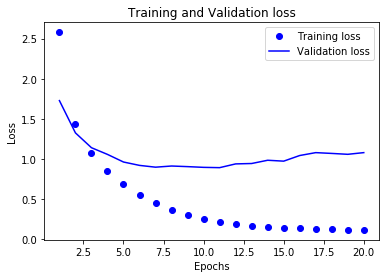

In [19]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

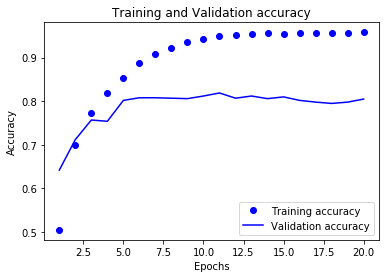

In [20]:
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(loss)+1)

plt.plot(epochs, acc, 'bo', label="Training accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation accuracy")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [21]:
model = models.Sequential()

model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))

model.compile(optimizer="rmsprop",
             loss="categorical_crossentropy",
             metrics=["accuracy"])

model.fit(partial_x_train, partial_y_train,
         epochs=9,
         batch_size = 512,
         validation_data = (x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 83us/sample - loss: 2.5559 - acc: 0.5509 - val_loss: 1.6821 - val_acc: 0.6460
Epoch 2/9
7982/7982 [==============================] - 1s 67us/sample - loss: 1.4079 - acc: 0.7082 - val_loss: 1.2883 - val_acc: 0.7200
Epoch 3/9
7982/7982 [==============================] - 1s 67us/sample - loss: 1.0624 - acc: 0.7719 - val_loss: 1.1209 - val_acc: 0.7710
Epoch 4/9
7982/7982 [==============================] - 1s 68us/sample - loss: 0.8409 - acc: 0.8187 - val_loss: 1.0336 - val_acc: 0.7810
Epoch 5/9
7982/7982 [==============================] - 1s 68us/sample - loss: 0.6734 - acc: 0.8520 - val_loss: 0.9695 - val_acc: 0.7900
Epoch 6/9
7982/7982 [==============================] - 1s 67us/sample - loss: 0.5430 - acc: 0.8864 - val_loss: 0.9306 - val_acc: 0.8040
Epoch 7/9
7982/7982 [==============================] - 1s 67us/sample - loss: 0.4346 - acc: 0.9109 - val_loss: 0.9161 - val_acc: 0.8110


</br>

## 3.5.5 새로운 데이터 예측

In [22]:
predictions = model.predict(x_test)

In [23]:
predictions[0].shape

(46,)

In [24]:
np.sum(predictions[0])

1.0000001

In [25]:
np.argmax(predictions[0])

3

</br>

# 3.6 Regression

In [1]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets),(test_data, test_targets) = boston_housing.load_data()


In [2]:
train_data.shape

(404, 13)

In [3]:
test_data.shape

(102, 13)

</br>

## 3.6.2 데이터 준비

#### 상이한 스케일을 가진 값을 특성별로 정규화(regularization)해주어야 한다.

##### 1. 입력 데이터에 있는 각각의 특성(입력 데이터의 column)에 대해서 특성의 평균을 빼고 표준 편차로 나누어준다.
##### 2. 특성의 중앙이 0 근처에 맞춰지고 표준편차는 1이 된다.

In [4]:
mean = train_data.mean(axis=0)
std = train_data.std(axis = 0)

train_data -= mean
train_data /= std

test_data -= mean
test_data /= std

</br>

## 3.6.3 모델 구성

#### training sample 수가 적기 때문에, 과대적합이 일어날 수 있다 그러므로 작은 모델을 사용하는 것이 좋다

In [5]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation="relu", input_shape = (train_data.shape[1],)))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(1))
    
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    
    return model

</br>

## 3.6.4 K-fold

#### training sample 수가 적기 때문에, K 개로 분할 한 후, K 개의 모델을 만들어 K-1 개의 분할에서 훈련하고 나머지 분할에서 평가.

#### 모델의 검증 점수는 K 개의 검증 점수 평균

In [13]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('처리중인 fold #', i)
    val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
    val_target = train_labels[i * num_val_samples : (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[: i * num_val_samples],
                                        train_data[(i + 1) * num_val_samples:]], axis=0)
    
    partial_train_target = np.concatenate([train_labels[: i * num_val_samples],
                                        train_labels[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    
    model.fit(partial_train_data, partial_train_target,
             epochs = num_epochs,
             batch_size = 1, verbose=0)
    
    val_mse, val_mae = model.evaluate(val_data, val_target)
    all_scores.append(val_mae)

처리중인 fold # 0
101/101 [==============================] - 0s 217us/sample - loss: 10.2544 - mean_absolute_error: 2.4925
처리중인 fold # 1
101/101 [==============================] - 0s 237us/sample - loss: 11.6489 - mean_absolute_error: 2.5076
처리중인 fold # 2
101/101 [==============================] - 0s 276us/sample - loss: 14.0780 - mean_absolute_error: 2.6356
처리중인 fold # 3
101/101 [==============================] - 0s 296us/sample - loss: 13.9764 - mean_absolute_error: 2.5069


In [14]:
all_scores

[2.4924672, 2.507594, 2.6356325, 2.5069432]

In [15]:
np.mean(all_scores)

2.5356593

</br>

### MAE 오차를 더 낮춰보자!

In [6]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('처리중인 fold #', i)
    val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
    val_target = train_targets[i * num_val_samples : (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[: i * num_val_samples],
                                        train_data[(i + 1) * num_val_samples:]], axis=0)
    
    partial_train_target = np.concatenate([train_targets[: i * num_val_samples],
                                        train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    
    history = model.fit(partial_train_data, partial_train_target,
                        epochs = num_epochs, batch_size = 1, verbose=0,
                        validation_data=(val_data, val_target))
    
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

처리중인 fold # 0
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
처리중인 fold # 1
처리중인 fold # 2
처리중인 fold # 3


In [7]:
average_mae_history =[np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

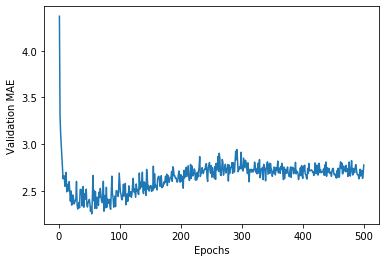

In [9]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)

plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

</br>

#### 지수이동 평균 (exponential moving average)

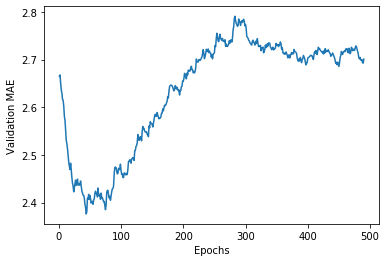

In [10]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
            
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [11]:
model = build_model()

model.fit(train_data, train_targets, 
         epochs = 80,
         batch_size = 16, 
         verbose = 0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 293us/sample - loss: 19.9013 - mean_absolute_error: 2.6587


In [12]:
test_mae_score

2.658687